In [1]:

import configparser
import os
import json
import pandas as pd

from collections import Counter

import re
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%run functions.ipynb

# <center> Partisanship Pandemic Patterns </center>

<table><tr>
<td> <img src="pictures/trump-covid-trends.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="pictures/200921-joe-biden-wisconsin-jm-1649_72078588c4236db6453f88da9c198d97.fit-1240w.png"  alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

### <center>  An analysis into the role of partisanship on our pandemic langauge & conversation </center>

### <center> By Joelle Gross </center>

# <center> Research Question & Hypothesis </center>

<center> <img src="pictures/889198-MASK-e4da3.jpg" width="400" height="400"> </center>

* There has been a lot of news coverage in the recent months about how the pandemic behaviors of both elites and the mass public have been distinctively different along party lines, I was interested to explore this further by dissecting how the use of language differs between partisans in tweets related to masks, vaccines, the economy, and general pandemic-related discussion
* **My research question**: *To what extent does partisanship describe language differences on topics related to the pandemic?*


* Here are the following hypotheses I will use to guide my research:


Hypothesis #1: *Conservatives are more likely to discuss economic-related topics regarding the pandemic than liberals.*

Hypothesis #2: *Liberals are more likely to discuss health-related topics, such as masks and vaccines than conservatives.*

Hypothesis #3: *Liberals are more likely to have positive sentiment surrounding the vaccines, masks, and econmy than Conservatives who are more likely to have a negative sentiment.*

# <center> My Corpora </center>

* Utilizing snscrape I pulled down the time-lines of 170 popular liberal accounts and 125 popular conservative accounts from the past year (March 1st, 2020-March 31st, 2021).
* I found a list of liberal and conservative accounts from Pablo Barbara's 2015 research paper, *Birds of the Same Feather Tweet Together*
* I randomly sampled the liberal tweets so both corpora would be the same size
* Each corpus has approximately 500,000 tweets.
* Below are some descriptive plots on both the liberal and conservative corpora

<center> <img src="graphics/data_overtime.png" width="600" height="600"> </center>

<table><tr>
<td> <img src="graphics/dem_figure.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="graphics/rep_figure.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

# <center> Initial Findings: Some Sentiment Analysis Using VADER </center>

* Below is a look into some sentiment analysis differences between the conservative and liberal corpuses 
* Here I graphed the average weekly sentiment score over time (from March 2020-March 2021)
* The first graph shows sentiment differences based on mask related words such as mask, maskless, mandate
* The second graph shows sentiment differences based on vaccine related words such as vaccine, vax, vaxxed, pfizer, moderna, etc..

In [3]:
con_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/con_final_data.csv")
lib_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/liberal_data_final.csv")

In [4]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [5]:
con_tokens=[]
for i in range(0,con_data.shape[0]):
    tokens=tokenize.wordpunct_tokenize(con_data.loc[i, "text"])
    con_tokens.append(tokens)
con_data["tokens"]=con_tokens

conservative_mask_tweets=[]
conservative_mask_tokens=[]
conservative_mask_created_at=[]
mask_words=["mask", "maskless","mandate"]
for i in range(0,con_data.shape[0]):
    for word in mask_words:
        if word in con_data.loc[i, "tokens"]:
            conservative_mask_tweets.append(con_data.loc[i, "text"])
            conservative_mask_tokens.append(con_data.loc[i, "tokens"])
            conservative_mask_created_at.append(con_data.loc[i, "created_at"])
con_mask_df=pd.DataFrame({"text":conservative_mask_tweets, "tokens": conservative_mask_tokens, "created_at": conservative_mask_created_at})
con_mask_df=con_mask_df.loc[con_mask_df.astype(str).drop_duplicates().index].copy()
sentiment_list=[]
for i in range(0,con_mask_df.shape[0]):
    tokens=con_data.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list.append(sentiment)
con_mask_df["sentiment number"]=sentiment_list
con_mask_df.set_index(pd.to_datetime(con_mask_df['created_at']), inplace=True)
con_mask_df.sort_index(inplace=True)
del con_mask_df["text"]
del con_mask_df["tokens"]

In [6]:
conservative_vax_tweets=[]
conservative_vax_tokens=[]
conservative_vax_created_at=[]
vax_words=["vaccine", "vax","vaxxed", "pfizer", "moderna", "johnson", "dose"]
for i in range(0,con_data.shape[0]):
    for word in vax_words:
        if word in con_data.loc[i, "tokens"]:
            conservative_vax_tweets.append(con_data.loc[i, "text"])
            conservative_vax_tokens.append(con_data.loc[i, "tokens"])
            conservative_vax_created_at.append(con_data.loc[i, "created_at"])
con_vax_df=pd.DataFrame({"text":conservative_vax_tweets, "tokens": conservative_vax_tokens, "created_at": conservative_vax_created_at})
                        
con_vax_df = con_vax_df.loc[con_vax_df.astype(str).drop_duplicates().index].copy()
                        
sentiment_list=[]
for i in range(0,con_vax_df.shape[0]):
    tokens=con_data.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list.append(sentiment)
                        
con_vax_df["sentiment number"]=sentiment_list
con_vax_df.set_index(pd.to_datetime(con_vax_df['created_at']), inplace=True)
con_vax_df.sort_index(inplace=True)
del con_vax_df["text"]
del con_vax_df["tokens"]

In [7]:
lib_data = lib_data.reset_index()
lib_tokens=[]
for i in range(0,lib_data.shape[0]):
    tokens=tokenize.wordpunct_tokenize(lib_data.loc[i, "text"])
    lib_tokens.append(tokens)
lib_data["tokens"]=lib_tokens

In [8]:
liberal_mask_tweets=[]
liberal_mask_tokens=[]
liberal_mask_created_at=[]
mask_words=["mask", "maskless","mandate"]
for i in range(0,lib_data.shape[0]):
    for word in mask_words:
        if word in lib_data.loc[i, "tokens"]:
            liberal_mask_tweets.append(lib_data.loc[i, "text"])
            liberal_mask_tokens.append(lib_data.loc[i, "tokens"])
            liberal_mask_created_at.append(lib_data.loc[i, "created_at"])
lib_mask_df=pd.DataFrame({"text":liberal_mask_tweets, "tokens": liberal_mask_tokens, "created_at": liberal_mask_created_at})
lib_mask_df=lib_mask_df.loc[lib_mask_df.astype(str).drop_duplicates().index].copy()
lib_mask_df= lib_mask_df.reset_index()
sentiment_list_lib=[]
for i in range(0,lib_mask_df.shape[0]):
    tokens=lib_mask_df.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list_lib.append(sentiment)
lib_mask_df["sentiment number"]=sentiment_list_lib
lib_mask_df.set_index(pd.to_datetime(lib_mask_df['created_at']), inplace=True)
lib_mask_df.sort_index(inplace=True)

In [9]:
liberal_vax_tweets=[]
liberal_vax_tokens=[]
liberal_vax_created_at=[]
vax_words=["vaccine", "vax","vaxxed", "pfizer", "moderna", "johnson", "dose"]
for i in range(0,lib_data.shape[0]):
    for word in vax_words:
        if word in lib_data.loc[i, "tokens"]:
            liberal_vax_tweets.append(lib_data.loc[i, "text"])
            liberal_vax_tokens.append(lib_data.loc[i, "tokens"])
            liberal_vax_created_at.append(lib_data.loc[i, "created_at"])
lib_vax_df=pd.DataFrame({"text":liberal_vax_tweets, "tokens": liberal_vax_tokens, "created_at": liberal_vax_created_at})
lib_vax_df=lib_vax_df.loc[lib_vax_df.astype(str).drop_duplicates().index].copy()
lib_vax_df.reset_index(inplace=True)
sentiment_list_lib=[]
for i in range(0,lib_vax_df.shape[0]):
    tokens=lib_vax_df.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list_lib.append(sentiment)
lib_vax_df["sentiment number"]=sentiment_list_lib
lib_vax_df.set_index(pd.to_datetime(lib_vax_df['created_at']), inplace=True)
lib_vax_df.sort_index(inplace=True)
del lib_vax_df["text"]
del lib_vax_df["tokens"]

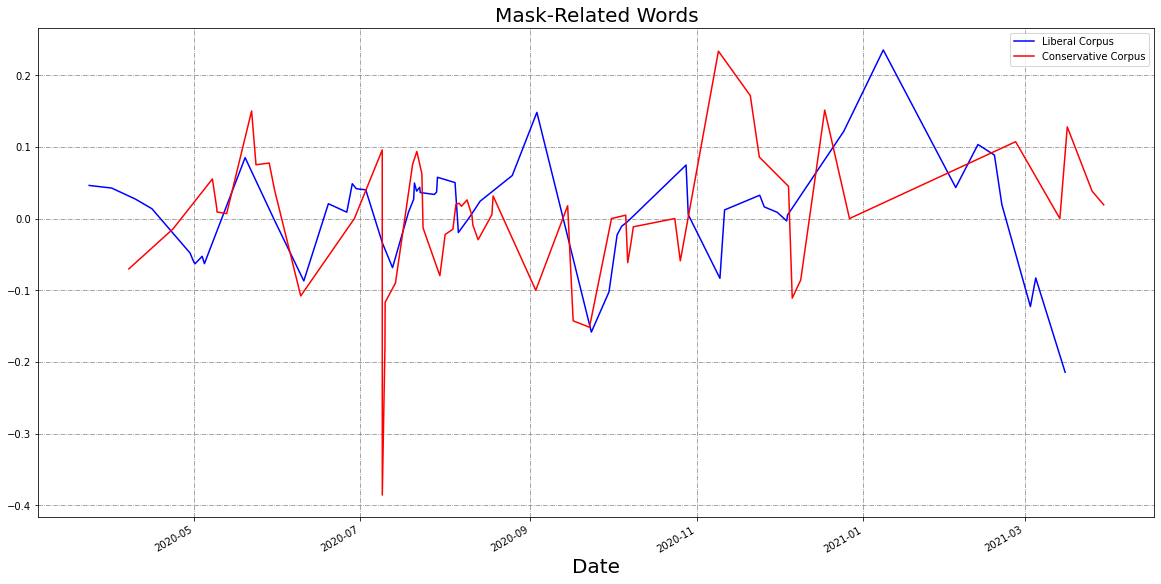

In [10]:
plt.figure(figsize=(20,10)) 
lib_mask_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Liberal Corpus", color="blue")
con_mask_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Conservative Corpus",color="red")
plt.legend()
plt.title("Mask-Related Words", fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.7)
plt.xlabel('Date', fontsize=20)
plt.show()

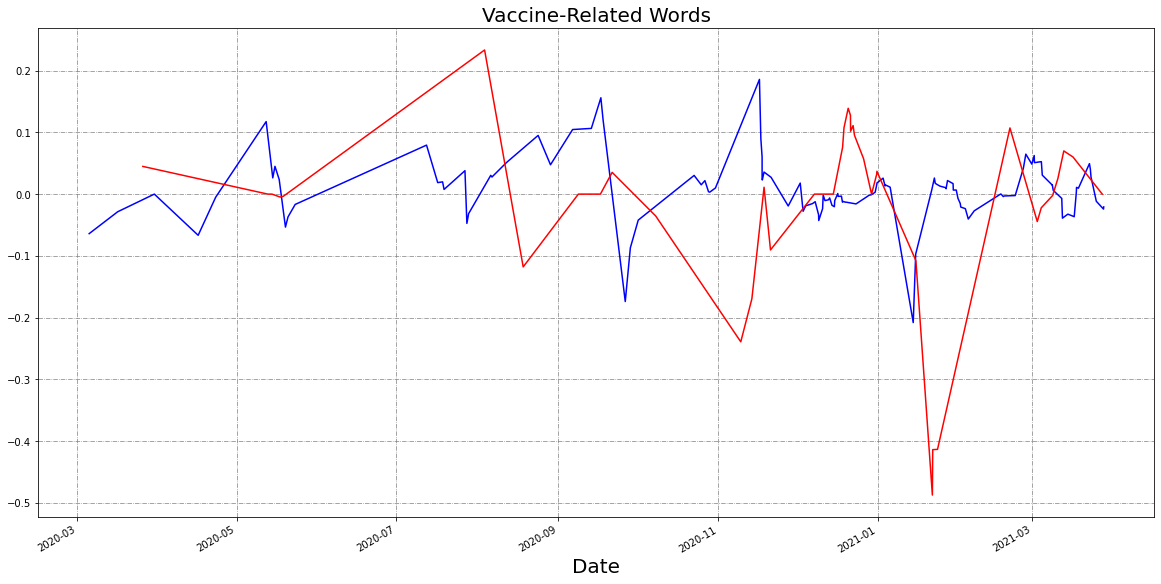

In [11]:
plt.figure(figsize=(20,10)) 
lib_vax_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label="Liberal Corpus",color="blue")
con_vax_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label="Conservative Corpus", color="red")
plt.title("Vaccine-Related Words",fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.7)
plt.show()


# <center> Further Analysis </center>

<table><tr>
<td> <img src="pictures/LOLGOP_tweet.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="pictures/patriot_tweet.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

* Further analysis will include:
    * Keyness analysis
    * KWIC analysis
    * Other types of sentiment analysis (TextBlob)
    
* Thank you!